# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
# Data Frame
print(df)

            Price  Mileage    Make     Model  ... Doors Cruise  Sound  Leather
0    17314.103129     8221   Buick   Century  ...     4      1      1        1
1    17542.036083     9135   Buick   Century  ...     4      1      1        0
2    16218.847862    13196   Buick   Century  ...     4      1      1        0
3    16336.913140    16342   Buick   Century  ...     4      1      0        0
4    16339.170324    19832   Buick   Century  ...     4      1      0        1
..            ...      ...     ...       ...  ...   ...    ...    ...      ...
799  16507.070267    16229  Saturn  L Series  ...     4      1      0        0
800  16175.957604    19095  Saturn  L Series  ...     4      1      1        0
801  15731.132897    20484  Saturn  L Series  ...     4      1      1        0
802  15118.893228    25979  Saturn  L Series  ...     4      1      1        0
803  13585.636802    35662  Saturn  L Series  ...     4      1      0        0

[804 rows x 12 columns]


In [4]:
# Linear Regression Equation
X = np.array(df["Mileage"])
Y = np.array(df["Price"])
print("Xmean: ",np.mean(X))
print("Ymean: ",np.mean(Y))
b1 = np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum(pow(X-np.mean(X),2))
print("\nb1: ",round(b1,2))
b0 = np.mean(Y) - b1*np.mean(X)
print("b0: ",round(b0,2))
print("\nEquation: Y = {} +({})X".format(round(b0,2),round(b1,2)))

Xmean:  19831.93407960199
Ymean:  21343.143767325837

b1:  -0.17
b0:  24764.56

Equation: Y = 24764.56 +(-0.17)X


In [5]:
# Y prediction
Y_pred = b0 + (b1)*X
print(f"Predicted Y: {Y_pred}")

Predicted Y: [23346.26795261 23188.58421306 22487.97845123 21945.22894945
 21343.13239471 20928.393106   20869.73613505 20802.79817996
 20620.44400851 20050.43626729 22998.46661899 22165.36511101
 21895.02548313 21348.65305079 20734.65258136 20664.60925723
 20622.68677505 20273.16023639 19089.32454624 18784.1357768
 23217.05009602 22939.80964804 22286.64702447 21916.59054598
 21502.54133928 21406.10237822 21073.65536935 20866.28572499
 20543.15482326 20409.2789131  22046.49848459 21963.68864325
 21633.82944191 20951.51085337 20691.00489415 20548.33043835
 20414.97208969 20144.63246181 20089.94346243 19649.4986188
 24248.37766171 23033.14324005 21600.70550537 21384.53731538
 21004.12960672 20649.59997348 20444.64561617 20442.57537014
 20371.49692299 19963.31341338 21770.81072113 21695.93682291
 21389.71293046 21290.51364135 21286.8907108  20664.26421622
 20568.34281667 19961.76072886 19729.20309109 19360.52677663
 24366.38168562 23036.93869111 21502.19629828 21296.03429744
 21235.997162

In [6]:
# R2 Score using Equation
r2_score = np.sum((Y_pred - np.mean(Y))**2) / np.sum((Y - np.mean(Y))**2)
print(r2_score)

0.020463447323489318


[]

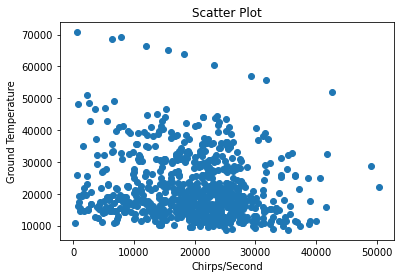

In [7]:
# Scatter Plot - Plot Data Points
plt.scatter(X, Y)
plt.title("Scatter Plot")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.plot()

[]

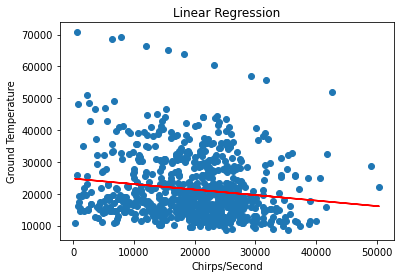

In [8]:
# Linear Regression Line Plot
plt.scatter(X, Y)
plt.plot(X, b0 +(b1)*X, color='RED')
plt.title("Linear Regression")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.plot()

In [9]:
# Using sklearn
reg = linear_model.LinearRegression()
reshape_X = X.reshape(-1, 1)
model = reg.fit(reshape_X, Y)
r2_score_sklearn = reg.score(reshape_X, Y)
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R2 Score: {r2_score_sklearn}")

Coefficient: [-0.1725205]
Intercept: 24764.559006061685
R2 Score: 0.02046344732348926


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Column names
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [21]:
# Multi Linear Regression
X = df.loc[:, ["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]]
Y = df.loc[:, "Price"]
MinMax = MinMaxScaler()
X = MinMax.fit_transform(X)
reg = linear_model.LinearRegression()
model = reg.fit(X, Y)
r2_score_sklearn = reg.score(X, Y)
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R2 Score: {r2_score_sklearn}")

Coefficient: [-8507.93110436 15169.51572313 -3463.77121919 -3085.49169276
  6288.99714985 -1993.7952757   3349.36161961]
Intercept: 17538.0730799493
R2 Score: 0.446264353672838


In [33]:
df_dummies = pd.get_dummies(df, columns = ["Make", "Model", "Type"])

In [34]:
df_dummies.columns

Index(['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

In [154]:
X = df_dummies.loc[:, ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
               'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
               'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
               'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO',
               'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS',
               'Model_Cavalier', 'Model_Century', 'Model_Classic',
               'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6',
               'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix',
               'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse',
               'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
               'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8',
               'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8',
               'Type_Convertible', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan',
               'Type_Wagon']]
Y = df_dummies.loc[:, "Price"]

In [44]:
reg = linear_model.LinearRegression()
model = reg.fit(X, Y)
r2_score_sklearn = reg.score(X, Y)
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R2 Score: {r2_score_sklearn}")

Coefficient: [-1.79761908e-01  5.42379044e+02  1.29237519e+03 -1.27829701e+03
  2.42035608e+01  2.18363418e+02  3.27988648e+02 -3.16039326e+03
  1.30213147e+04 -4.88007742e+03 -4.67567935e+03  4.71023130e+03
 -5.01539600e+03 -2.60920515e+03  4.76735849e+02  1.51108916e+03
  3.43085398e+03  1.90075746e+03 -4.93611922e+03  3.57062194e+02
  3.77804366e+03 -6.53389096e+03 -3.94804525e+03 -4.61122096e+03
 -2.89432746e+03 -2.94078233e+03  1.18477723e+04 -3.46964696e+03
  2.71553375e+02  5.52879392e+03 -3.98758695e+03 -1.56899086e+03
  4.38170518e+02 -2.67596496e+03 -2.33943105e+03  2.26749166e+02
 -1.34597822e+03 -2.48428616e+03  3.75401387e+01  2.57005676e+03
 -1.87689942e+02  2.99162869e+03 -4.35664023e+03 -9.19870791e+02
  1.64428702e+04  3.40614520e+03 -2.76699669e+03 -3.34485968e+02
 -5.19546067e+02  2.14883530e+02]
Intercept: 25165.824779247992
R2 Score: 0.9804768702447504


In [175]:
X_columns = ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [176]:
X = df.loc[:, X_columns]
Y = df.loc[:, "Price"]

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
LE = LabelEncoder()

In [179]:
for col in ["Make", "Model", "Trim", "Type"]:
    X[col] = LE.fit_transform(X[col])
print(X)

     Mileage  Make  Model  Trim  Type  ...  Liter  Doors  Cruise  Sound  Leather
0       8221     0     10    44     3  ...    3.1      4       1      1        1
1       9135     0     10    44     3  ...    3.1      4       1      1        0
2      13196     0     10    44     3  ...    3.1      4       1      1        0
3      16342     0     10    44     3  ...    3.1      4       1      0        0
4      19832     0     10    44     3  ...    3.1      4       1      0        1
..       ...   ...    ...   ...   ...  ...    ...    ...     ...    ...      ...
799    16229     5     21    21     3  ...    3.0      4       1      0        0
800    19095     5     21    21     3  ...    3.0      4       1      1        0
801    20484     5     21    21     3  ...    3.0      4       1      1        0
802    25979     5     21    21     3  ...    3.0      4       1      1        0
803    35662     5     21    21     3  ...    3.0      4       1      0        0

[804 rows x 11 columns]


In [180]:
from itertools import combinations

In [181]:
comb = []
for i in range(1, 50):
    comb.append(combinations(X_columns, i))
max_score = 0
features = None
for group in comb:
    group = list(group)
    for feature in group:
        feature = list(feature)
        model = reg.fit(X[feature], Y)
        if model.score(X[feature], Y) > max_score:
            max_score = model.score(X[feature], Y)
            features = feature
print(f"Best Feature Combination with Linear Regression: {features} with Score {max_score}")

Best Feature Combination with Linear Regression: ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with Score 0.5011334140890769
